In [10]:
from ultralytics import YOLO
import numpy as np
import cv2
from mss import mss
from PIL import Image, ImageDraw
from collections import defaultdict
import torch

model = YOLO("yolov8m.pt")

In [8]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

model.to(device)

In [9]:
video_path = "tenis.mp4"

cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    success, frame = cap.read()

    if success:
        results = model.track(frame, persist=True)

        annotated_frame = results[0].plot()

        cv2.imshow("YOLOv8 Tracking", annotated_frame)

        if cv2.waitKey(1) & 0xFF == ord("q") or cv2.waitKey(1) & 0xFF == ord("Q"):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()


0: 384x640 2 persons, 50.5ms
Speed: 2.0ms preprocess, 50.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 31.5ms
Speed: 7.0ms preprocess, 31.5ms inference, 15.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 44.5ms
Speed: 2.0ms preprocess, 44.5ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 persons, 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 3.0ms postprocess per image at shape 

In [21]:
results = model.train(data='C:/Users/Kuba/Desktop/-/object-detection/tennis-ball-detection-dataset/data.yaml', epochs=100)

New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.160  Python-3.11.3 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
engine\trainer: task=detect, mode=train, model=yolov8m.pt, data=C:/Users/Kuba/Desktop/-/object-detection/tennis-ball-detection-dataset/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_wi

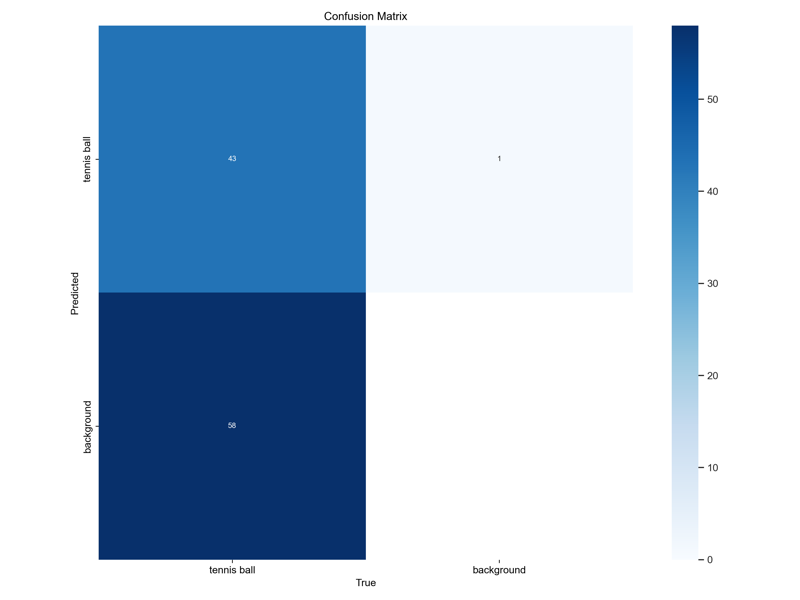

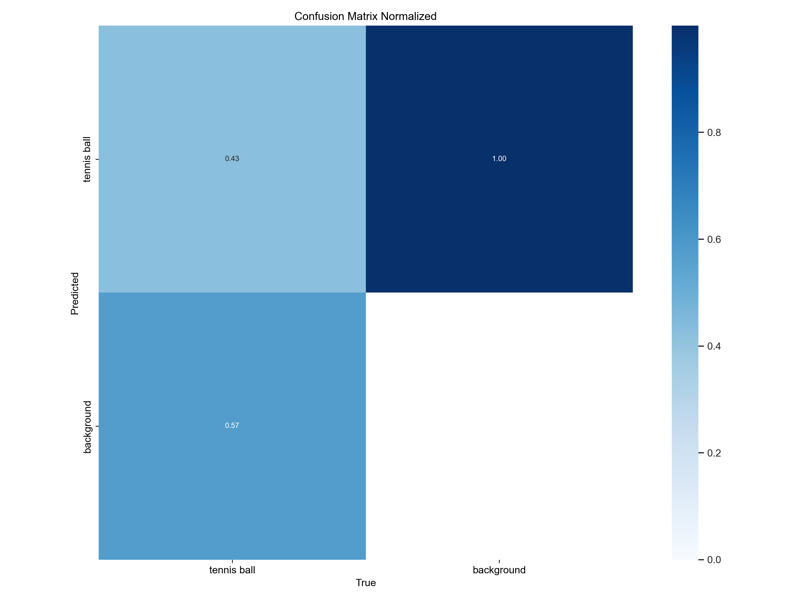

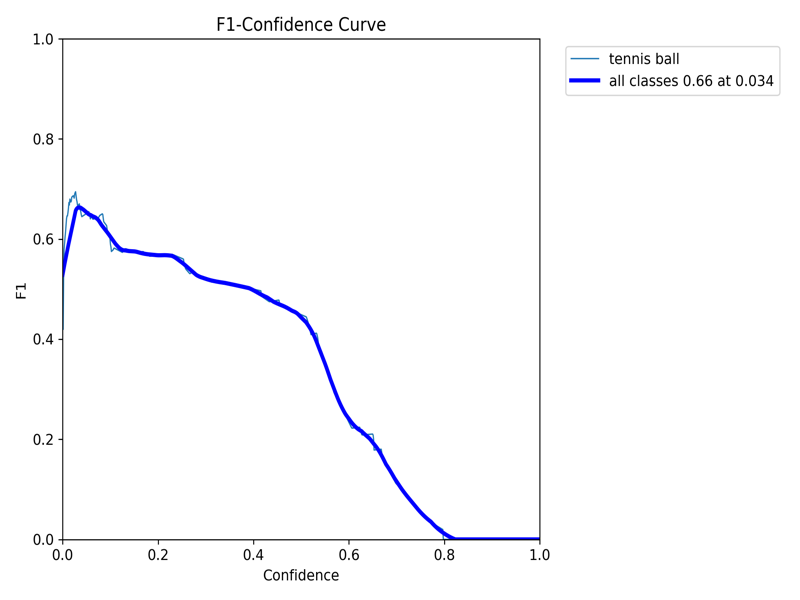

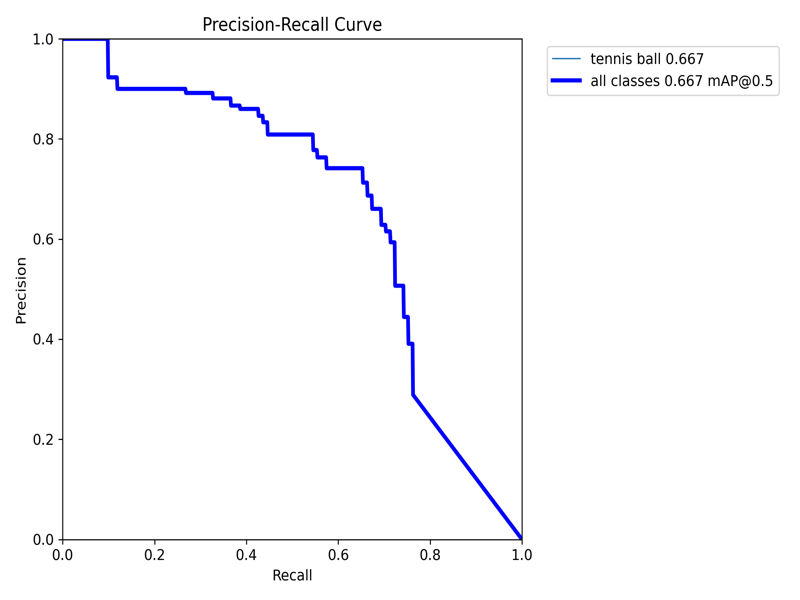

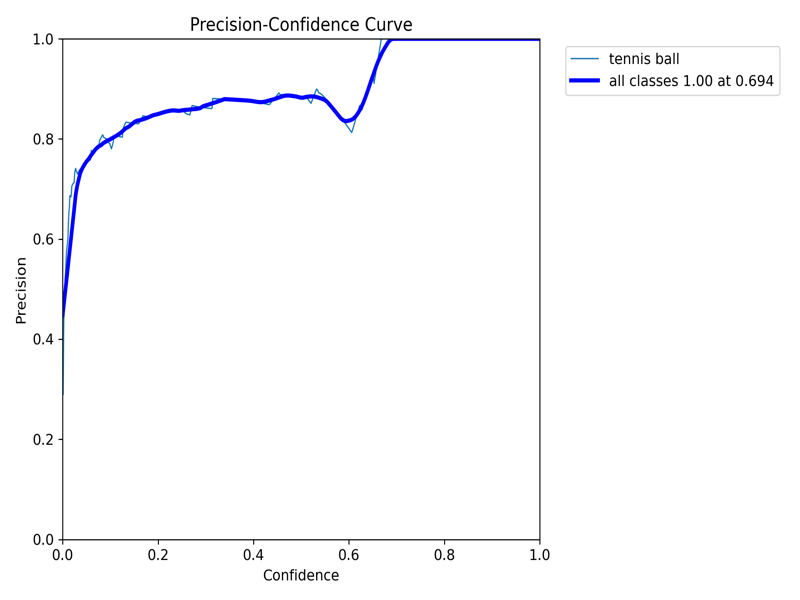

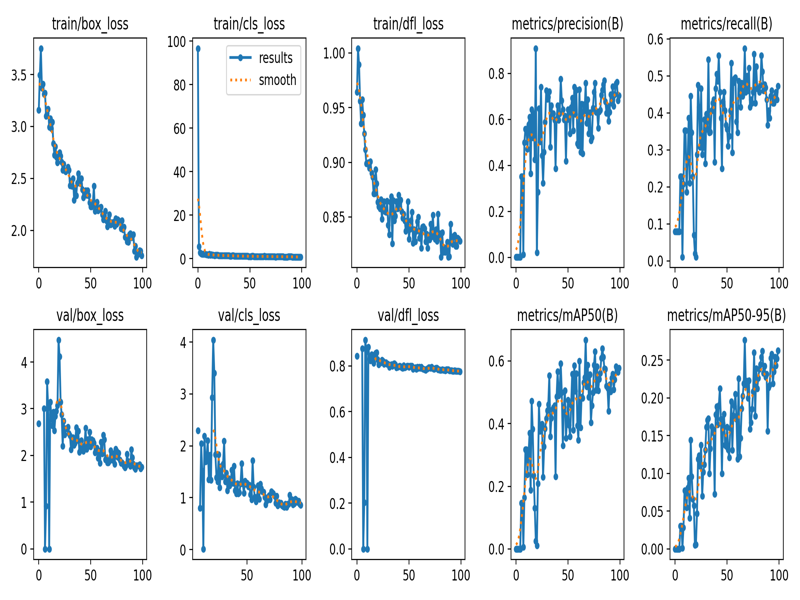

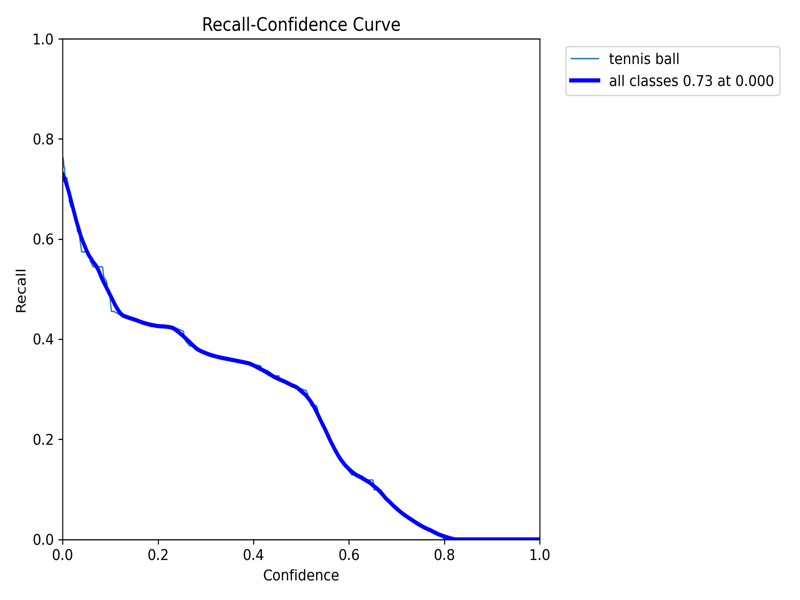

In [34]:
import os
from IPython.display import display

directory = 'runs\detect/train8'

for filename in os.listdir(directory):
    if filename.endswith(".png"):
        image_path = os.path.join(directory, filename)

        image = Image.open(image_path)

        desired_size = (800, 600)
        
        resized_image = image.resize(desired_size)

        resized_image.title = filename
        
        display(resized_image)